# Explore F_S near Brazil

In [28]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pandas

# Load up

In [2]:
fs_dict = np.load('F_S_pdfs.npz')

In [3]:
list(fs_dict.keys())

['R1_F_s', 'R2_F_s']

In [4]:
R1_F_s = fs_dict['R1_F_s']
R2_F_s = fs_dict['R2_F_s']

In [30]:
nR1 = R1_F_s.shape[0]
nR2 = R2_F_s.shape[0]
nR1, nR2

(181, 59)

# Explore

## Max, min

In [5]:
R1_F_s.min(), R1_F_s.max()

(-0.005270866706190598, 0.01998569300716011)

In [11]:
bins = np.linspace(R1_F_s.min(), R1_F_s.max(), 100)

In [7]:
R2_F_s.min(), R2_F_s.max()

(-0.0008923193394548408, 0.0040310095013785414)

$\sigma$

In [19]:
rms_R2 = np.std(R2_F_s.flatten())
rms_R2

2.4177158757338034e-05

## Histogram

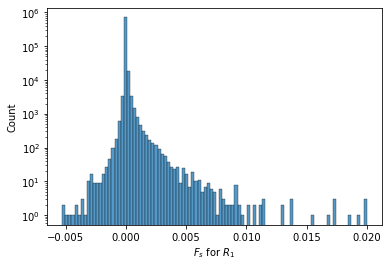

In [21]:
ax = sns.histplot(x=R1_F_s.flatten(), bins=bins, log_scale=(False,True))
ax.set_xlabel(r'$F_s$ for $R_1$')
plt.savefig('F_s_R1_hist.png', dpi=200)

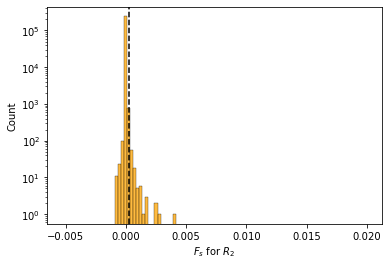

In [22]:
ax = sns.histplot(x=R2_F_s.flatten(), bins=bins, log_scale=(False,True), color='orange')
ax.set_xlabel(r'$F_s$ for $R_2$')
ax.axvline(10*rms_R2, color='k', ls='--')
plt.savefig('F_s_R2_hist.png', dpi=200)

# Thresholds

In [50]:
F_s_pos = 10*rms_R2
F_s_neg = -10*rms_R2
F_s_pos

0.00024177158757338036

## R1

In [59]:
R1_pos_vals = []
R1_neg_vals = []
R1_either_vals = []
for ii in range(nR1):
    npos = np.sum(R1_F_s[ii,...] > F_s_pos)
    nneg = np.sum(R1_F_s[ii,...] < F_s_neg)
    #print(np.max(R1_F_s[ii,...]))
    # Save
    R1_pos_vals.append(npos)
    R1_neg_vals.append(nneg)
    R1_either_vals.append(max(nneg, npos))

In [60]:
np.min(R1_either_vals), np.max(R1_either_vals)

(0, 320)

## R2

In [61]:
R2_pos_vals = []
R2_neg_vals = []
R2_either_vals = []
for ii in range(nR2):
    npos = np.sum(R2_F_s[ii,...] > F_s_pos)
    nneg = np.sum(R2_F_s[ii,...] < F_s_neg)
    # Save
    R2_pos_vals.append(npos)
    R2_neg_vals.append(nneg)
    R2_either_vals.append(max(npos,nneg))

## Collate

In [62]:
df = pandas.DataFrame()
df['pos'] = R1_pos_vals + R2_pos_vals
df['neg'] = R1_neg_vals + R2_neg_vals
df['either'] = R1_either_vals + R2_either_vals
df['R'] = ['1']*nR1 + ['2']*nR2

## Plot em

### Positive

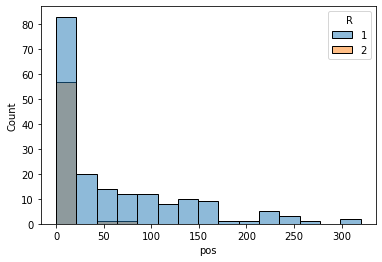

In [57]:
sns.histplot(df, x='pos', hue='R')#, bins=np.arange(45))
plt.savefig('pos_hist.png', dpi=200)

### Negative

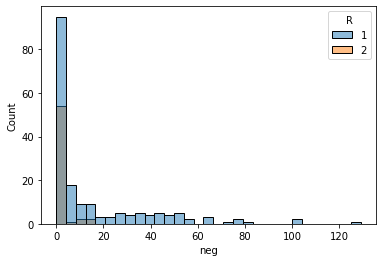

In [58]:
sns.histplot(df, x='neg', hue='R')#, bins=np.arange(45))
plt.savefig('neg_hist.png', dpi=200)

### Either

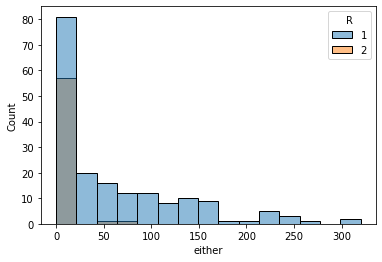

In [63]:
sns.histplot(df, x='either', hue='R')#, bins=np.arange(45))
plt.savefig('either_hist.png', dpi=200)